In [1]:
import sys
sys.path.insert(1, '../src')
from utils import *

# When does it make sense to buy a house?

Consider a house like the one in the following link: 

https://www.zillow.com/homedetails/2816-Glen-Decker-Ct-San-Jose-CA-95148/19732225_zpid/

We want to see if it makes sense to buy this house (in San Jose, CA) or invest money in the market. We consider the fact that if you don't buy this house, you will need to pay rent. The assumption is that if you don't buy this house, you will invest all your money in stock market and buy an SP-500 index fund. In case, you don't buy the property, you will also invest the remaining difference between the mortgage rate and the rent into the index fund. Also, the rent increases according to inflation rate and there is an assumption for the inflation rate.

### What will be the value of this house in 30 year?

According to the historic home values from the following link:

https://www.zillow.com/research/data/

during the period between 1996 and 2020, the housing price had an average annual rate of increase of 6.8% in San Jose, CA.

0.0679

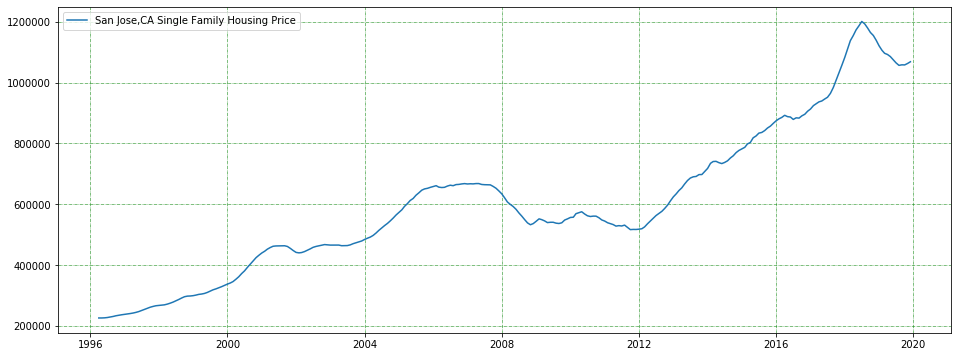

In [2]:
_,_,c = plot_housing_index('San Jose', 'CA')
c

0.0628

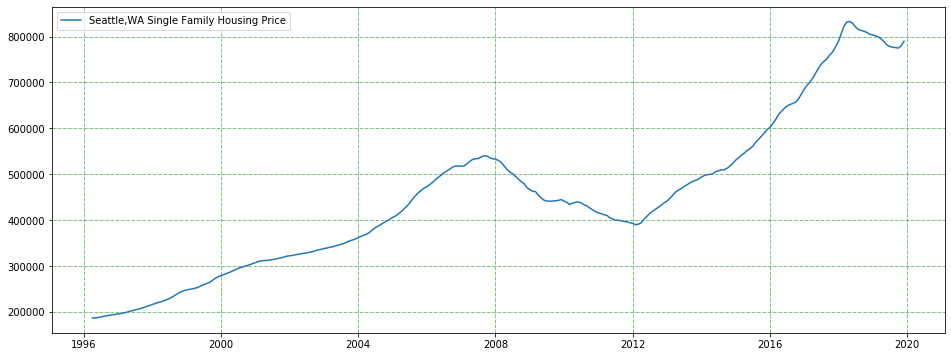

In [3]:
_,_,c = plot_housing_index('Seattle', 'WA')
c

0.0706

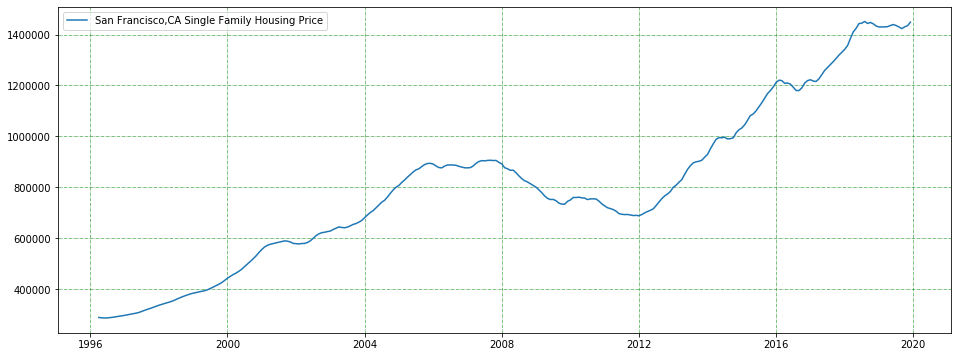

In [4]:
_,_,c = plot_housing_index('San Francisco', 'CA')
c

0.0505

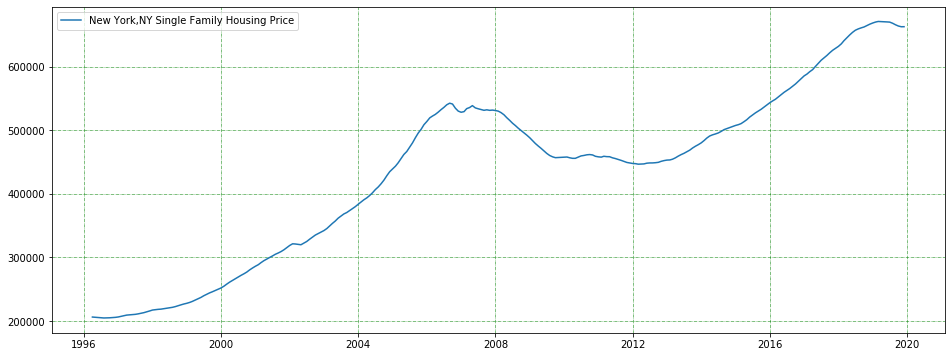

In [5]:
_,_,c = plot_housing_index('New York', 'NY')
c

0.0594

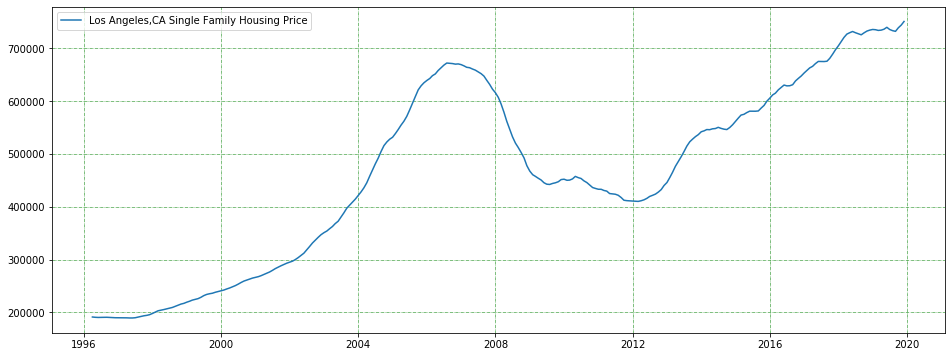

In [6]:
_,_,c = plot_housing_index('Los Angeles', 'CA')
c

0.0513

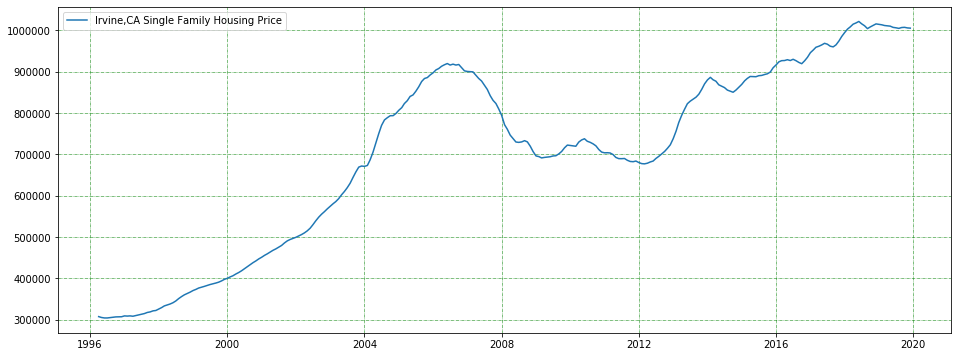

In [7]:
_,_,c = plot_housing_index('Irvine', 'CA')
c

Assuming that about the same rate of return will exist in the future, over a span of 30 years the price of homes in San Jose will be at least 7 times the current prices:

In [8]:
home_gain = 1.068**30 
home_gain

7.196769293890855

Assumed parameters:

In [9]:
price = 1320000
mortgage_apr_y = 3.741 * 0.01  # Base on 700+ credit score 
market_return = 0.1
rent = 3400

In [10]:
def mortgage_calculator(mortgage_apr_y, price):
    mortgage_apr_m = mortgage_apr_y / 12
    down = price/5
    loan = price - down 
    coupon = loan*mortgage_apr_m / (1-1/((1+mortgage_apr_m)**360))
    return coupon

In [11]:
def compute_FV_no_real_estate(price, mortgage_apr_y, market_return, rent, inflation = 0.02, tax_credit = 8000,\
                              tax_rate = 0.007, home_insurance = 5544, maintenance = 600):
    coupon = mortgage_calculator(mortgage_apr_y, price)
    tax_yearly = price * tax_rate
    yearly_expenses = tax_yearly + home_insurance + maintenance - tax_credit
    monthly_payment = yearly_expenses/12 + coupon
    monthly_inflation = inflation/12
    down = price / 5 
    loan = price - down 
    FV_downpayment = down * (1 + market_return)**30 
    FV_price = FV_downpayment
    for j in range(1, 361):
        Rj = rent * (1 + inflation)**(j // 12) 
        FV_price += (monthly_payment - Rj) * (1 + market_return/12)**(360-j) 
    return FV_price

In [12]:
compute_FV_no_real_estate(price, mortgage_apr_y, market_return, rent)

7934872.205060279

In [13]:
def compute_FV_real_estate(city, state, price):
    _, _, housing_return = plot_housing_index(city, state)
    housing_gain = (1+housing_return)**30
    return housing_gain*price

9473087.015264066

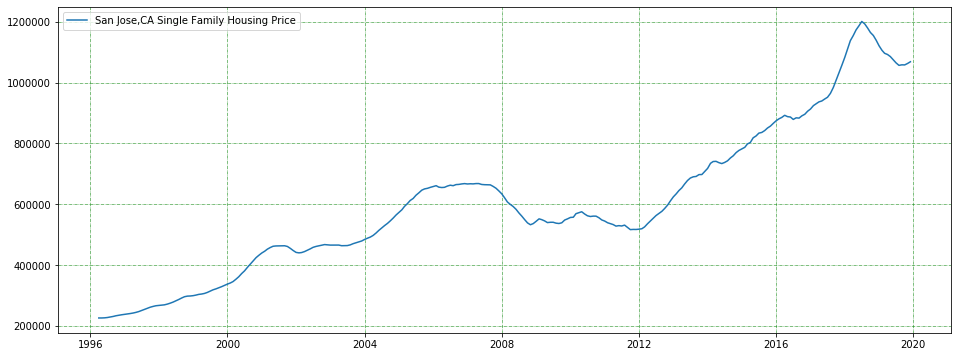

In [14]:
compute_FV_real_estate('San Jose', 'CA', price)

Therefore, assuming a 10% market return over a period of 30 years, by a margin of around 1.5 million dollars you would be better off investing your money in real estate in San Jose, CA.

### What if you invest in an index fund that tracks SP-500?

This is a chart of return of SP-500 over the last 30 years:

0.0759

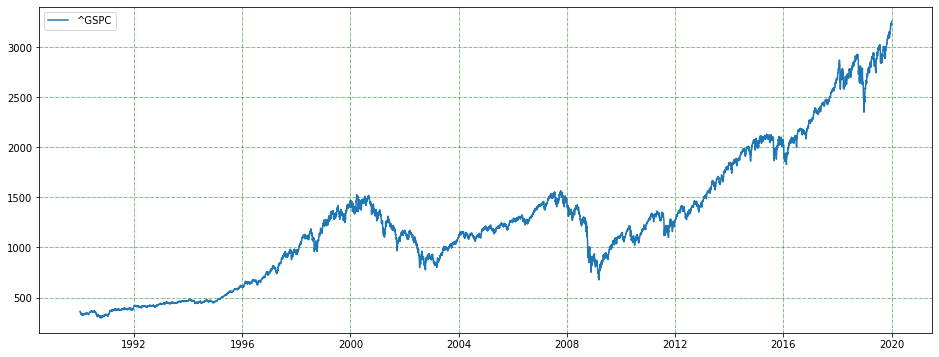

In [15]:
sp_500_30_year_avg_return = plot_stock_price('^GSPC', start_date='1990-01-01', end_date='2020-01-01')
sp_500_30_year_avg_return

Therefore, Assuming the same return for SP-500 over the next 30 years (and no stock management and other fees) we have 

In [17]:
compute_FV_no_real_estate(price, mortgage_apr_y, sp_500_30_year_avg_return, rent)

4235568.610489796

This means that over the span of 30 years, you would lose over 5 million dollars by paying rent and instead investing in the stock market

In [18]:
compute_FV_no_real_estate(price, mortgage_apr_y, sp_500_30_year_avg_return, 0)

9916544.797303408

However, as shown above, if you don't have to pay rent, you would be better off (by around 500K in 30 years) by buying the index fund than investing in the real estate.